<a href="https://colab.research.google.com/github/Amal-Alalami/FinalProject/blob/main/CNN_ABF(NewData).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import os
import pandas as pd
import seaborn as sns
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# to generate data
from keras.preprocessing.image import ImageDataGenerator

# to build model
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
%matplotlib inline

# Upload Dataset

In [2]:
!7z x ADNI.zip



7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 106677136 bytes (102 MiB)

Extracting archive: ADNI.zip
 79% 4096 Open              --
Path = ADNI.zip
Type = zip
Physical Size = 106677136

  0%      6% 328 - Axial/AD/AD023_S_0139b111.png                                         10% 543         12% 658 - Axial/AD/AD032_S_1101a100.png                                         14% 784 - Axial/AD/AD116_S_0487a111.png                                         17% 910 - Axial/AD/AD130_S_

# **Pre-processed data and Visualize Sample Images**

In [3]:
# Method to print sample images from each class

def print_sample_images(train_path, class_labels):

  plt.figure(figsize=(10, 10))
  for i, class_name in enumerate(class_labels):

    # Get a random image from the class directory
    img_name = np.random.choice(os.listdir(os.path.join(train_path, class_name)))
    img_path = os.path.join(train_path, class_name, img_name)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(4, 4, i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

  plt.show()

**Sample of train images before pre-processing data from each class**

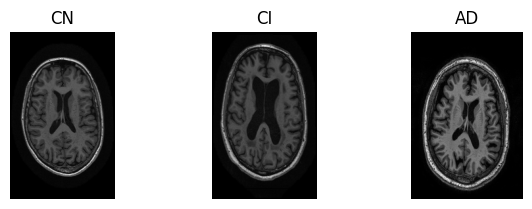

In [4]:
data_dir = '/content/Axial'
class_names = os.listdir('/content/Axial')
print_sample_images(data_dir, class_names)

**Pre-processing data**

In [5]:
def process_images_in_folder(folder_path):
  image_width, image_height = 128, 128

  for filename in os.listdir(folder_path):
    image_path = os.path.join(folder_path, filename)
    image = cv2.imread(image_path)

    #pre-processing data using ABF (Adaptive Bilateral filter)

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    bilateral = cv2.bilateralFilter(gray_image, 5, 0.3, 0.3)

    # Save the pre-processed image with the same filename
    cv2.imwrite(image_path, bilateral)

In [6]:
data_path = '/content/Axial'
class_labels = os.listdir('/content/Axial')


def data_to_be_processed(class_path ,class_labels):
  for class_label in class_labels:
    class_folder_path = os.path.join(class_path, class_label)
    process_images_in_folder(class_folder_path)



# train data
data_to_be_processed(data_path, class_labels)

# test data
#data_to_be_processed(test_data_path, class_labels)

**Sample of train images after pre-processing data from each class**

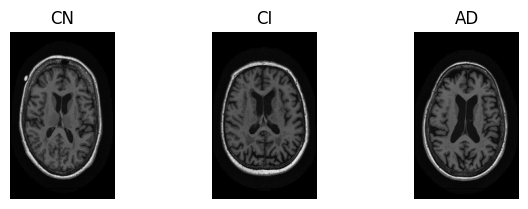

In [8]:
data_dir = '/content/Axial'
class_names = os.listdir('/content/Axial')
print_sample_images(data_dir, class_names)

# Images in train data

In [9]:
data_folder = '/content/Axial'
class_names_train_folder = os.listdir(data_folder)
class_count = []

for class_name in class_names_train_folder:
  num_images = len(os.listdir(os.path.join(data_folder, class_name)))
  class_count.append(num_images)
  print(f"Class {class_name}: {num_images} images")


Class CN: 1440 images
Class CI: 2590 images
Class AD: 1124 images


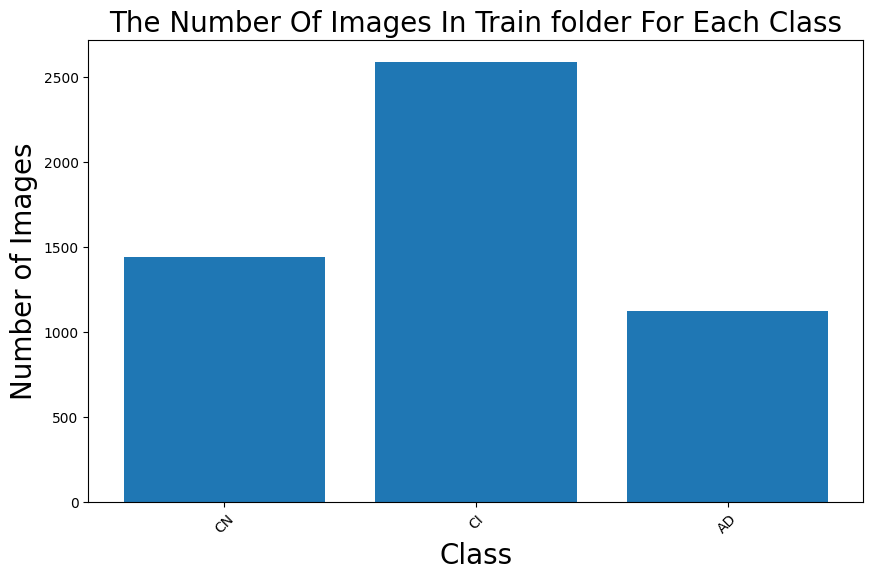

In [10]:

plt.figure(figsize=(10, 6))
plt.bar(class_names_train_folder, class_count)

plt.title('The Number Of Images In Train folder For Each Class', fontsize=20)
plt.xlabel("Class", fontsize = 20)
plt.ylabel("Number of Images", fontsize=20)
plt.xticks(rotation=45)

plt.show()


# **Train Test split and Build Model**

In [12]:
#  Loads all images and labels from a directory and converts them to a NumPy array.

def load_train_data(data_dir):

  image_width, image_height = 128, 128
  class_names = os.listdir(data_dir)
  class_name_to_label = {class_name: i for i, class_name in enumerate(class_names)}
  images = []
  labels = []

  for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_path):

      image_path = os.path.join(class_path, filename)
      image = cv2.imread(image_path)
      image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
      image = cv2.resize(image, (image_width, image_height))
      image = image / 255.0 #normalize

      label = class_name_to_label[class_name]
      images.append(image)
      labels.append(label)

  # Convert the list of images to a NumPy array
  X_train = np.asarray(images)
  Y_train = np.asarray(labels)

  return X_train, Y_train

In [13]:
X_train , Y_train = load_train_data('/content/Axial')

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

In [16]:
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")

X_train shape: (3607, 128, 128)
Y_train shape: (3607,)


In [17]:
X_val, X_test, Y_val , Y_test = train_test_split(X_test, Y_test, test_size=0.7, random_state=42)


In [19]:
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_test shape: (1083, 128, 128)
Y_test shape: (1083,)


In [20]:
print(f"X_val shape: {X_val.shape}")
print(f"Y_val shape: {Y_val.shape}")

X_val shape: (464, 128, 128)
Y_val shape: (464,)


In [21]:
Y_train

array([2, 1, 0, ..., 1, 1, 0])

In [22]:
Y_train = tf.keras.utils.to_categorical(Y_train)

In [23]:
Y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [24]:
print(Y_train.shape)

(3607, 3)


In [25]:
Y_test

array([0, 1, 1, ..., 1, 1, 1])

In [26]:
Y_test_cat = tf.keras.utils.to_categorical(Y_test)

In [27]:
print(Y_test_cat.shape)

(1083, 3)


In [28]:
Y_test_cat

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [29]:
Y_val

array([0, 2, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1,
       0, 1, 1, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 2,
       1, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 1, 1,
       0, 1, 1, 2, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0,
       0, 2, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 1, 2, 2, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1, 2, 0,
       1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 2, 1,
       1, 1, 2, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 2, 2, 0,
       2, 0, 2, 0, 1, 2, 1, 0, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2,
       1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 1, 0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 0, 1,

In [30]:
Y_val_cat = tf.keras.utils.to_categorical(Y_val)

In [31]:
print(Y_val_cat.shape)

(464, 3)


In [32]:
Y_val_cat

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [35]:
# CNN model
model1 = Sequential()
inputSize = (128,128,1)

#ilters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu')
model1.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=inputSize, activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=inputSize, activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=inputSize, activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Flatten())

model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(3, activation = 'softmax'))
model1.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [36]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 32)       

In [37]:
results = model1.fit(X_train, Y_train, epochs=35, validation_data=(X_val, Y_val_cat))

Epoch 1/35
113/113 [==============================] - 77s 670ms/step - loss: 0.8975 - accuracy: 0.5769 - val_loss: 0.7045 - val_accuracy: 0.6875
Epoch 2/35
113/113 [==============================] - 88s 779ms/step - loss: 0.4173 - accuracy: 0.8373 - val_loss: 0.3434 - val_accuracy: 0.8685
Epoch 3/35
113/113 [==============================] - 79s 695ms/step - loss: 0.1043 - accuracy: 0.9667 - val_loss: 0.1158 - val_accuracy: 0.9677
Epoch 4/35
113/113 [==============================] - 75s 660ms/step - loss: 0.0616 - accuracy: 0.9789 - val_loss: 0.1712 - val_accuracy: 0.9375
Epoch 5/35
113/113 [==============================] - 74s 653ms/step - loss: 0.0408 - accuracy: 0.9848 - val_loss: 0.1228 - val_accuracy: 0.9547
Epoch 6/35
113/113 [==============================] - 71s 631ms/step - loss: 0.0268 - accuracy: 0.9911 - val_loss: 0.0618 - val_accuracy: 0.9828
Epoch 7/35
113/113 [==============================] - 76s 671ms/step - loss: 0.0040 - accuracy: 0.9997 - val_loss: 0.0564 - val_ac

In [38]:
print(model1.output_shape)

(None, 3)


In [39]:
hist_=pd.DataFrame(results.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.897462,0.576934,0.704454,0.687500
1,0.417313,0.837261,0.343445,0.868535
2,0.104312,0.966731,0.115779,0.967672
3,0.061598,0.978930,0.171162,0.937500
4,0.040844,0.984752,0.122822,0.954741
5,0.026805,0.991128,0.061821,0.982759
6,0.004021,0.999723,0.056353,0.987069
7,0.000508,1.000000,0.054993,0.987069
8,0.000292,1.000000,0.048340,0.987069
9,0.000203,1.000000,0.042649,0.987069


# **Model Evaluation**

In [40]:
loss, acc = model1.evaluate(X_test, Y_test_cat)
print('loss: ', loss)
print('accuracy ', acc)

34/34 [==============================] - 5s 155ms/step - loss: 0.0106 - accuracy: 0.9972
loss:  0.010605432093143463
accuracy  0.9972299337387085


In [41]:
# Reshape Y_test to a 1-dimensional array
Y_test = Y_test.reshape(-1,)

predictions = model1.predict(X_test)
Y_predected = np.argmax(predictions, axis=1)
#Y_test_ = np.argmax(Y_test,axis=0)

df = pd.DataFrame({'Actual': Y_test, 'Prediction': Y_predected})
df

34/34 [==============================] - 6s 168ms/step


,Actual,Prediction
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
1078,1,1
1079,1,1
1080,1,1
1081,1,1


array([[307,   1,   0],
       [  0, 529,   0],
       [  1,   1, 244]])

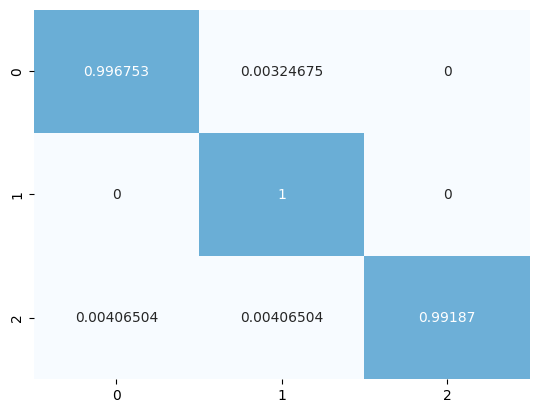

In [42]:
CM = confusion_matrix(Y_test,Y_predected)
CM_percent = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]

sns.heatmap(CM_percent,fmt='g',center = True,cbar=False,annot=True,cmap='Blues')
CM

In [43]:
print(classification_report(Y_test, Y_predected))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       308
           1       1.00      1.00      1.00       529
           2       1.00      0.99      1.00       246

    accuracy                           1.00      1083
   macro avg       1.00      1.00      1.00      1083
weighted avg       1.00      1.00      1.00      1083

